### Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20
0,Casos nuevos con sintomas,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,2219.0,2371.0,1985.0,1444.0,1400.0,1949.0,2125.0,1624.0,1615.0,1599.0
1,Casos totales,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,312029.0,315041.0,317657.0,319493.0,321205.0,323698.0,326539.0,328846.0,330930.0,333029.0
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6881.0,6979.0,7024.0,7069.0,7186.0,7290.0,8347.0,8445.0,8503.0,8633.0
4,Casos activos,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,24008.0,24166.0,24077.0,23205.0,21934.0,21107.0,21378.0,20952.0,20633.0,20404.0
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,405.0,389.0,451.0,244.0,186.0,367.0,545.0,373.0,359.0,340.0
6,Casos nuevos totales,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,2755.0,3012.0,2616.0,1836.0,1712.0,2475.0,2840.0,2185.0,2082.0,2099.0
7,Casos activos por FD,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,44263.0,43059.0,41658.0,40100.0,39162.0,39157.0,38450.0,36999.0,35398.0,34472.0
8,Casos activos por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24008.0,24166.0,24077.0,23205.0,21934.0,21107.0,21378.0,20952.0,20633.0,20404.0
9,Casos recuperados por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,281140.0,283896.0,286556.0,289219.0,292085.0,295301.0,296814.0,299449.0,301794.0,303992.0


In [3]:
def dia_cambio_metodologia(X,Y):
    plt.text(X, Y, 'Cambio de metodologia')

In [4]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
def Graph(name_item):
    data_by_item = data[(data.Item == name_item)].values
    Y            = np.delete(data_by_item, 0)
    X            = data.columns[1:]
    plt.figure(figsize=(20,10))
    plt.plot(X, Y, 'b')
    plt.plot(X, Y, 'bo')
    labelonbars([X[len(X)-1]], [Y[len(X)-1]])
    #dia_cambio_metodologia('2020-04-29',770)
    plt.xlabel('Fecha')
    plt.ylabel(name_item)
    plt.title(name_item)
    plt.grid()
    #plt.yscale('log')
    plt.xticks(X, rotation='vertical')
    plt.show()

## Casos totales

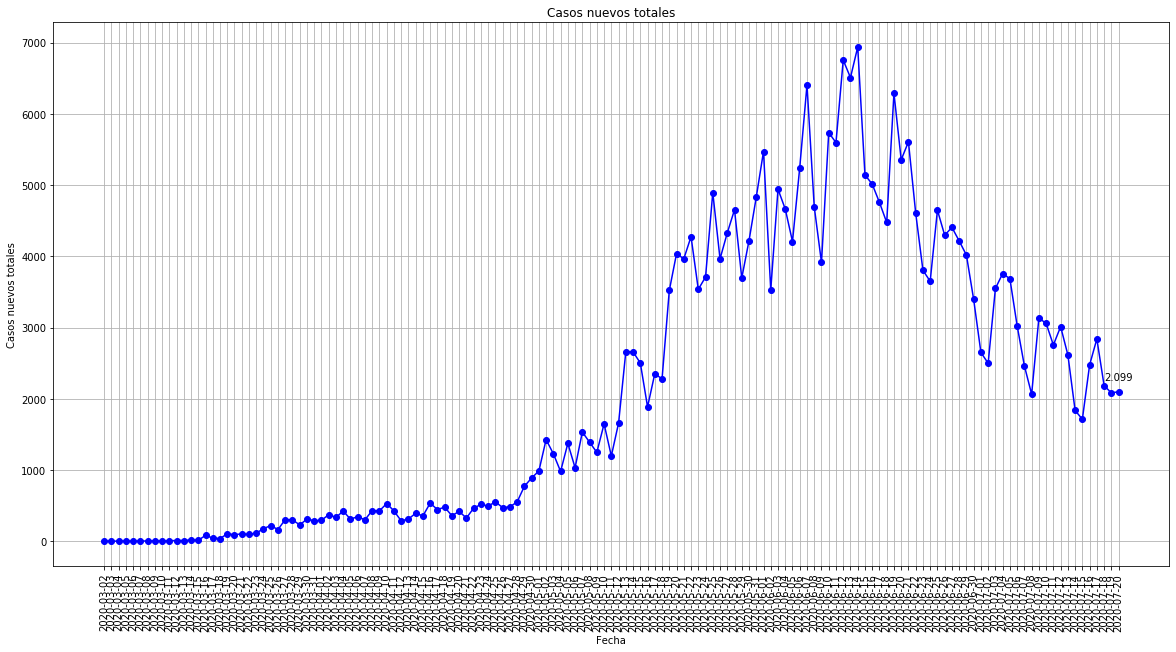

In [5]:
Graph("Casos nuevos totales")

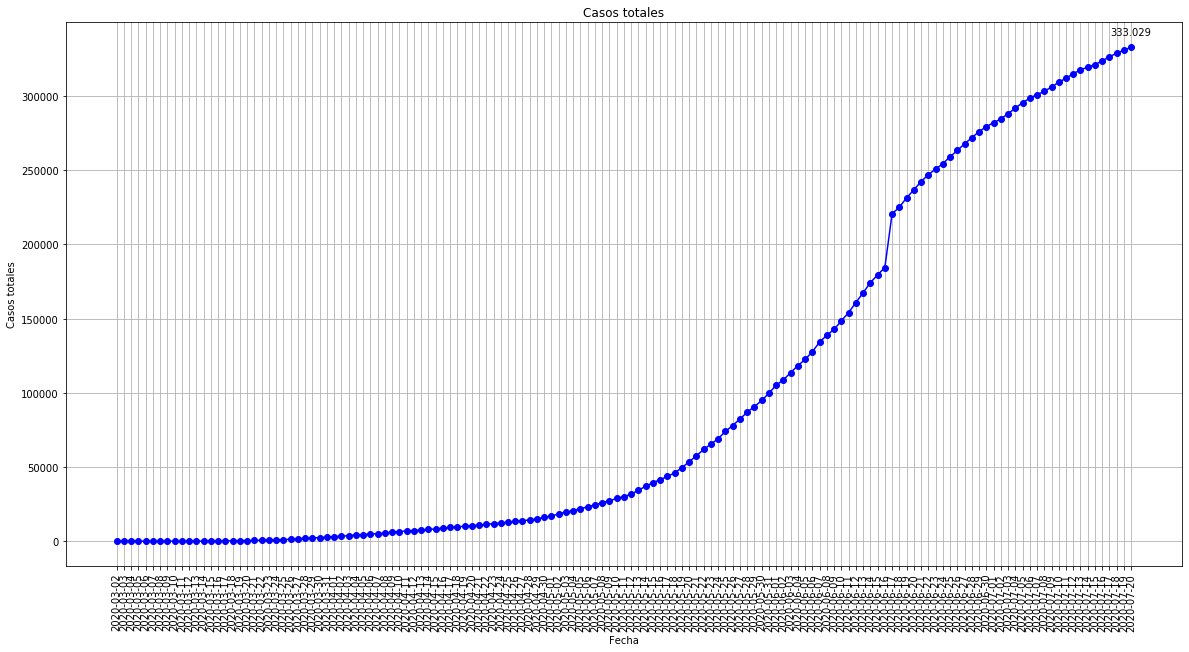

In [6]:
Graph("Casos totales")

In [7]:
#Graph("Casos recuperados")

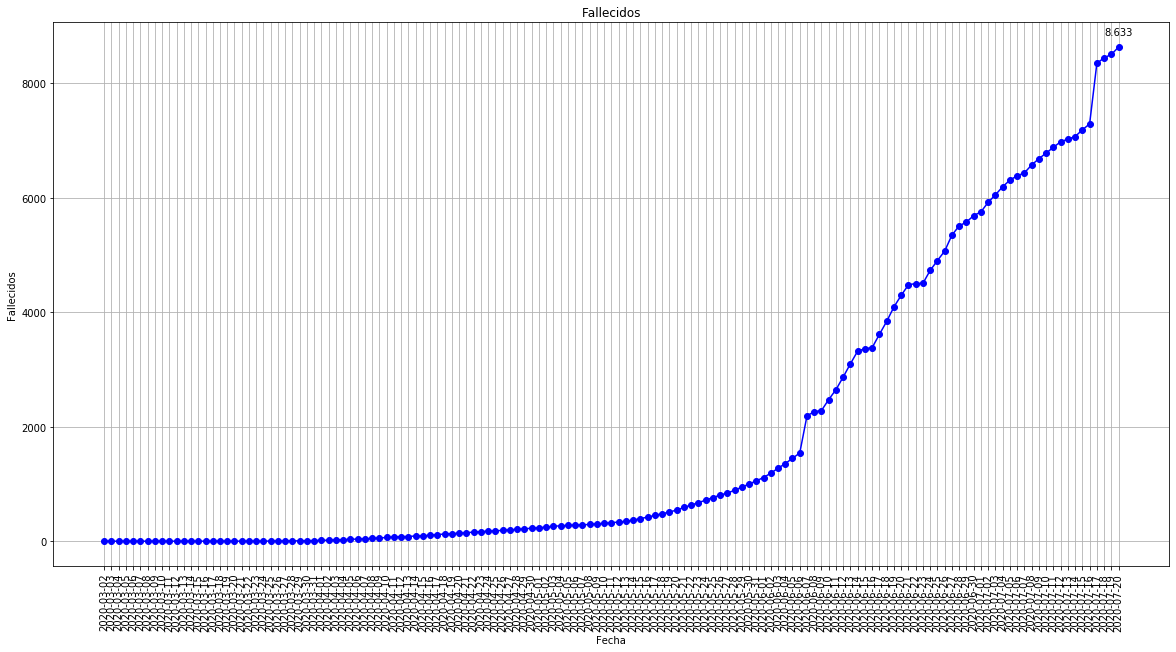

In [8]:
Graph("Fallecidos")

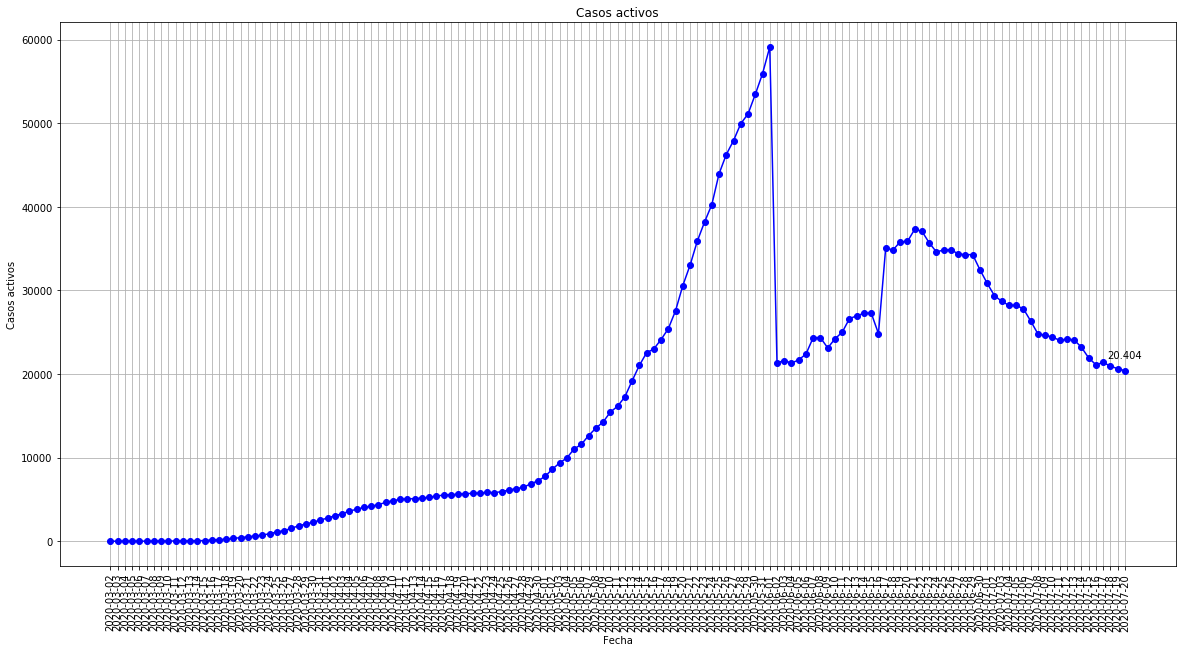

In [9]:
Graph("Casos activos")

## Regresión polinomica casos acumulados

In [10]:
fechas = data.columns[1:]
casos_totales = data[data["Item"]=="Casos totales"].values[0][1:]
dias          = [i for i in range (len(casos_totales))]
df = pd.DataFrame({
    'fecha': fechas,
    'dias': dias,
    'casos totales': casos_totales
})
df.tail(10)

,fecha,dias,casos totales
131,2020-07-11,131,312029
132,2020-07-12,132,315041
133,2020-07-13,133,317657
134,2020-07-14,134,319493
135,2020-07-15,135,321205
136,2020-07-16,136,323698
137,2020-07-17,137,326539
138,2020-07-18,138,328846
139,2020-07-19,139,330930
140,2020-07-20,140,333029


In [11]:
X = df[["dias"]]
Y = df[["casos totales"]]

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(degree=12)
X_data = poly.fit_transform(X)

In [22]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lm.score(X_data, Y)

0.9988673633356288

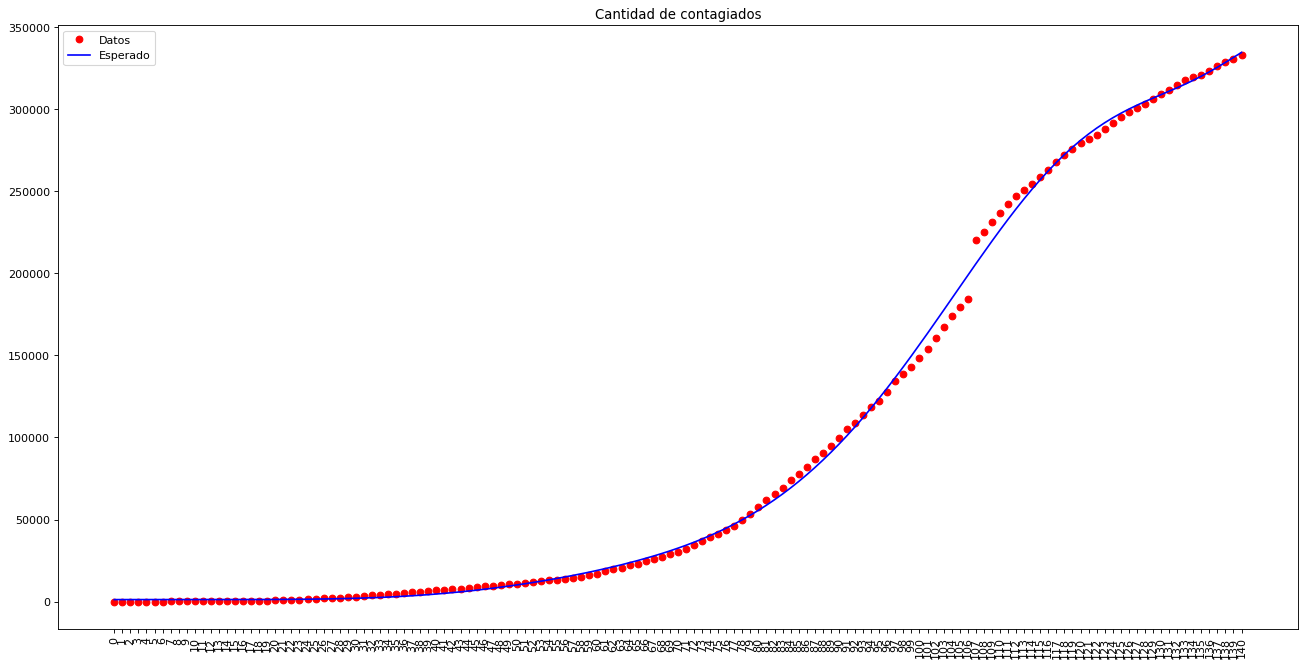

In [24]:
%matplotlib inline
Y_predict = lm.predict(X_data)
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, Y, "ro")
plt.plot(X, Y_predict, color="blue")
plt.xticks(X.values.tolist(), rotation='vertical')
plt.legend(["Datos", "Esperado"])
plt.title("Cantidad de contagiados")
plt.show()

## Media de los errores

In [25]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)

In [26]:
df["Casos totales predict"] = Y_predict
df["Casos totales predict"] = df["Casos totales predict"].astype(int)

In [27]:
mse = mean_squared_error(y_true = Y, y_pred = Y_predict)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
rmse

3903.197220411418

## Predicción

In [28]:
for i in range(len(df)-1, len(df)+2):
    prediccion   = int(lm.predict(poly.fit_transform([[i]])))
    prediccion_0 = prediccion - int(rmse)
    prediccion_1 = prediccion + int(rmse)
    
    prediccion_0 = '{:,}'.format(int(prediccion_0)).replace(',', '.')
    prediccion_1 = '{:,}'.format(int(prediccion_1)).replace(',', '.')
    
    
    if i == len(df) - 1:
        print ("Hoy:    " + str(prediccion_0) + " - " + str(prediccion_1) + " infectados aprox")
    else:
        print ("Día "+ str(i)+ ": "  + str(prediccion_0) + " - " + str(prediccion_1) + " infectados aprox.")

Hoy:    330.835 - 338.641 infectados aprox
Día 141: 333.718 - 341.524 infectados aprox.
Día 142: 336.261 - 344.067 infectados aprox.
